In [67]:
from google.colab import drive
import os
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [68]:
base_dir = '/content/drive/My Drive/dataset'
!ls "/content/drive/My Drive/dataset/"

bahan  latih  validasi


In [71]:
#menentukan direktori
bahan_dir = os.path.join(base_dir,'bahan')
train_dir = os.path.join(base_dir,'latih')
validation_dir = os.path.join(base_dir,'validasi')

In [72]:
#menentukan direktori isi bahan
lima_dir = os.path.join(bahan_dir,'limapuluh/')
tujuh_dir = os.path.join(bahan_dir,'tujuhlima/')

print("Jumlah Data Train Tiap Kelas")
print('Jumlah gambar uang 50.000  :',len(os.listdir(lima_dir)))
print('Jumlah gambar uang 75.000 :',len(os.listdir(tujuh_dir)))

Jumlah Data Train Tiap Kelas
Jumlah gambar uang 50.000  : 100
Jumlah gambar uang 75.000 : 100


In [73]:
# Direktori isi latih/training
train_lima = os.path.join(train_dir,'limapuluh/')
train_tujuh = os.path.join(train_dir, 'tujuhlima/')

# Direktori isi validasi
validation_lima = os.path.join(validation_dir,'limapuluh/')
validation_tujuh = os.path.join(validation_dir,'tujuhlima/')

In [74]:
import random
from shutil import copyfile

def train_val_split(source, train, val, train_ratio):
  total_size = len(os.listdir(source))
  train_size = int(train_ratio * total_size)
  val_size = total_size - train_size

  randomized = random.sample(os.listdir(source), total_size)
  train_files = randomized[0:train_size]
  val_files = randomized[train_size:total_size]

  for i in train_files:
    i_file = source + i
    destination = train + i
    copyfile(i_file, destination)

  for i in val_files:
    i_file = source + i
    destination = val + i
    copyfile(i_file, destination)

#jumlah pembagian data training dan testing
train_ratio = 0.9

#Pembagian Training dan Validasi
#Training
source_00 = lima_dir
train_00 = train_lima
val_00 = validation_lima
train_val_split(source_00, train_00, val_00, train_ratio)

# Validasi
source_01 = tujuh_dir
train_01 = train_tujuh
val_01 = validation_tujuh
train_val_split(source_01, train_01, val_01, train_ratio)

In [75]:
print('Jumlah All Lima puluh   :', len(os.listdir(lima_dir)))
print('Jumlah Train Lima puluh :', len(os.listdir(train_lima)))
print('Jumlah Val Lima puluh   :', len(os.listdir(validation_lima)))

Jumlah All Lima puluh   : 100
Jumlah Train Lima puluh : 90
Jumlah Val Lima puluh   : 10


In [76]:
print('Jumlah All tujuh lima   :', len(os.listdir(tujuh_dir)))
print('Jumlah Train tujuh lima :', len(os.listdir(train_tujuh)))
print('Jumlah Val tujuh lima   :', len(os.listdir(validation_tujuh)))

Jumlah All tujuh lima   : 100
Jumlah Train tujuh lima : 90
Jumlah Val tujuh lima   : 10


In [80]:
plt.style.use("seaborn-white")

<ipython-input-80-41a971457199>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-white")


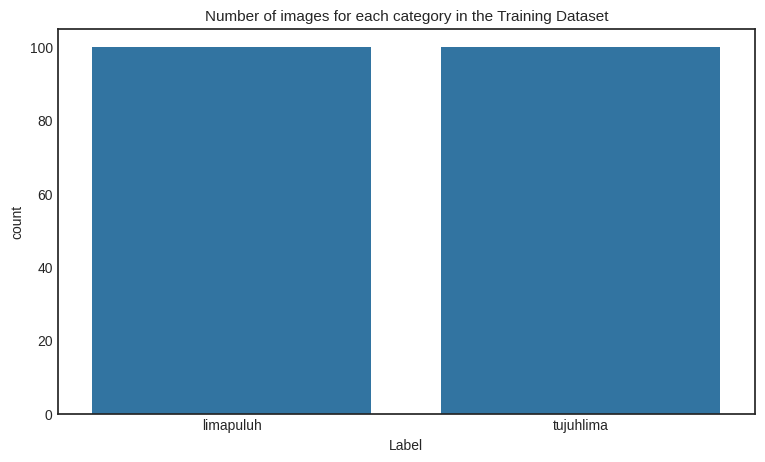

In [81]:
vc = df['Label'].value_counts()
plt.figure(figsize = (9, 5))
sns.barplot(x = vc.index, y = vc)
plt.title("Number of images for each category in the Training Dataset", fontsize = 11)
plt.show()

Text(0.5, 1.0, 'limapuluh')

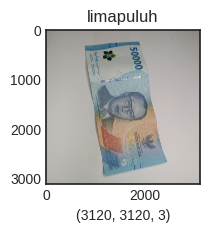

In [82]:
figure = plt.figure(figsize=(2,2))
x = plt.imread(df["File"][50])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(df["Label"][50])

Text(0.5, 1.0, 'tujuhlima')

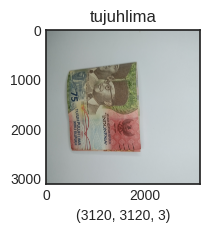

In [83]:
figure = plt.figure(figsize=(2, 2))
x = plt.imread(df["File"][11])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(df["Label"][11])

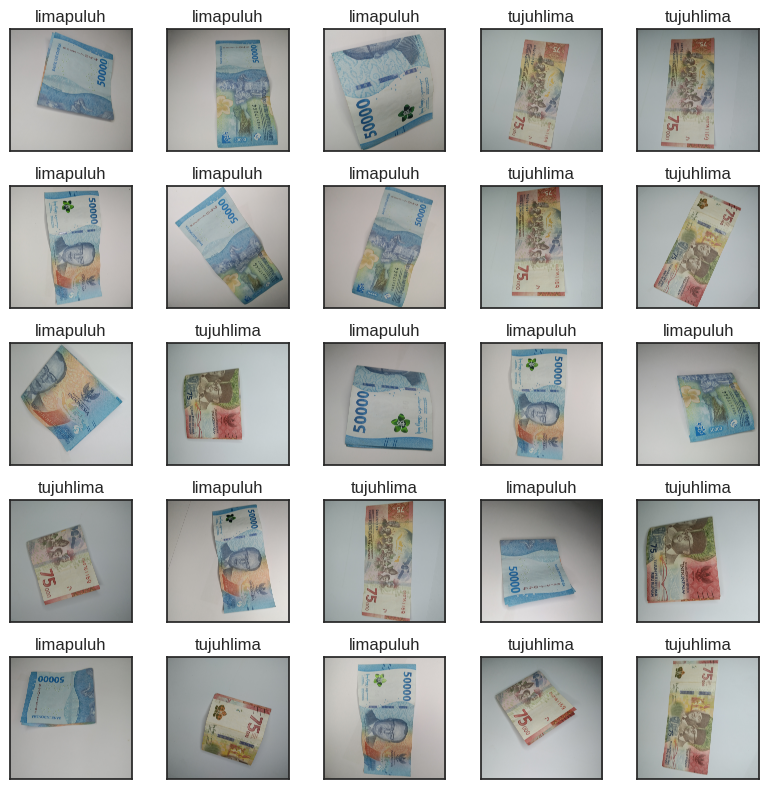

In [84]:
fig, axes = plt.subplots(nrows = 5,
                        ncols = 5,
                        figsize = (8, 8),
                        subplot_kw = {"xticks":[],"yticks":[]})

for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df["File"][i]))
    ax.set_title(df["Label"][i])
plt.tight_layout()
plt.show()

In [85]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [86]:
train_datagen = ImageDataGenerator(
                rescale = 1./255,
                rotation_range = 30,
                horizontal_flip = True,
                shear_range = 0.3,
                fill_mode = 'nearest',
                width_shift_range = 0.2,
                height_shift_range = 0.2,
                zoom_range = 0.1
)

val_datagen = ImageDataGenerator(
                rescale = 1./255,
                rotation_range = 30,
                horizontal_flip = True,
                shear_range = 0.3,
                fill_mode = 'nearest',
                width_shift_range = 0.2,
                height_shift_range = 0.2,
                zoom_range = 0.1
)

In [87]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 10,
    class_mode = 'categorical'
)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size= (150,150),
    batch_size = 10,
    class_mode = 'categorical'
)

Found 180 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [88]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('accuracy') > 0.99):
      print('\nAkurasi mencapai 99%')
      self.model.stop_training = True

callbacks = myCallback()

In [89]:
model = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
          tf.keras.layers.MaxPooling2D(2, 2),
          tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
          tf.keras.layers.MaxPooling2D(2, 2),
          tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(200, activation = 'relu'),
          tf.keras.layers.Dropout(0.3,seed=112),
          tf.keras.layers.Dense(500, activation = 'relu'),
          tf.keras.layers.Dropout(0.5,seed=112),
          tf.keras.layers.Dense(2, activation = 'sigmoid')
])

In [90]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 74, 74, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 36, 36, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 17, 17, 64)       

In [91]:
model.compile(loss = 'categorical_crossentropy',
              optimizer ='Adam',
              metrics = ['accuracy'])

In [92]:
history = model.fit(
            train_generator,
            steps_per_epoch = 9,
            epochs = 15,
            validation_data = val_generator,
            validation_steps = 1,
            verbose = 1,
            callbacks = [callbacks]
)

Epoch 1/15
9/9 [==============================] - 15s 2s/step - loss: 0.7521 - accuracy: 0.4556 - val_loss: 0.6811 - val_accuracy: 0.9000
Epoch 2/15
9/9 [==============================] - 11s 1s/step - loss: 0.6354 - accuracy: 0.6667 - val_loss: 0.5476 - val_accuracy: 1.0000
Epoch 3/15
9/9 [==============================] - 12s 1s/step - loss: 0.5523 - accuracy: 0.7556 - val_loss: 0.4668 - val_accuracy: 0.9000
Epoch 4/15
9/9 [==============================] - 11s 1s/step - loss: 0.3831 - accuracy: 0.8222 - val_loss: 0.2190 - val_accuracy: 0.9000
Epoch 5/15
9/9 [==============================] - 11s 1s/step - loss: 0.1506 - accuracy: 0.9889 - val_loss: 0.0396 - val_accuracy: 1.0000
Epoch 6/15
9/9 [==============================] - 12s 1s/step - loss: 0.3322 - accuracy: 0.8444 - val_loss: 0.1755 - val_accuracy: 0.9000
Epoch 7/15
9/9 [==============================] - 13s 1s/step - loss: 0.1944 - accuracy: 0.9222 - val_loss: 0.1844 - val_accuracy: 0.9000
Epoch 8/15
9/9 [==================

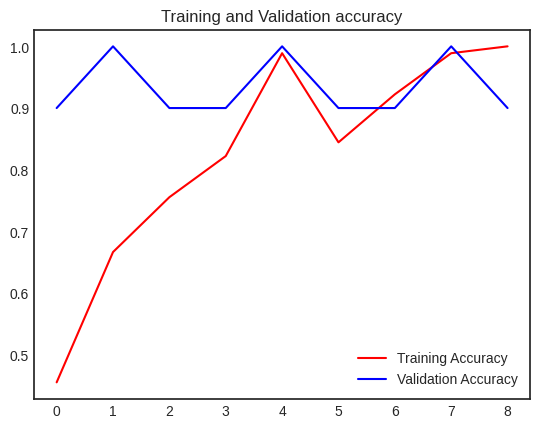

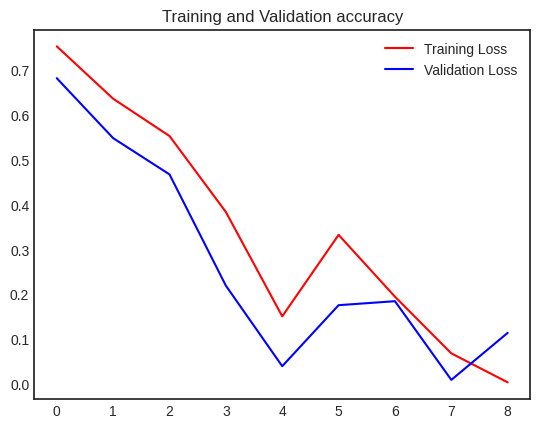

In [93]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc = 'best')
plt.show()

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label ='Validation Loss')
plt.title('Training and Validation accuracy')
plt.legend(loc = 'best')
plt.show()

Saving Screenshot 2024-04-06 165201.png to Screenshot 2024-04-06 165201 (1).png
1/1 [==============================] - 0s 128ms/step
Screenshot 2024-04-06 165201 (1).png
This image belongs to class limapuluh


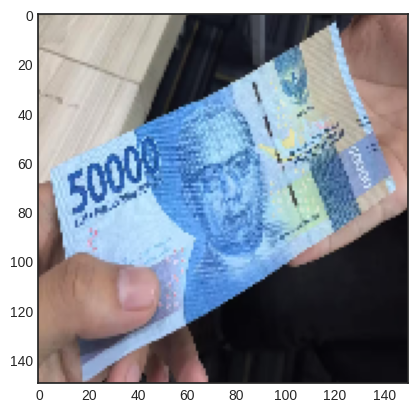

In [94]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 100)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1. :
      print('This image belongs to class', class_list[j-1])
      break

Saving images.jpg to images.jpg
1/1 [==============================] - 0s 36ms/step
images.jpg
This image belongs to class tujuhlima


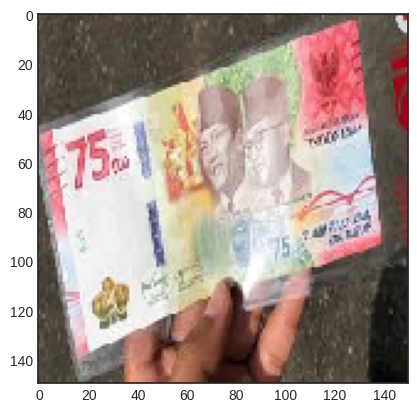

In [95]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 100)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1. :
      print('This image belongs to class', class_list[j-1])
      break